## This homework is done by group number 24:
##### 1-Simay Caliskan  simaycaliskan13@gmail.com

##### 2-Milad Torabi    miladtorabi65@gmail.com

##### 3-Aadrish      aadrish.cs@gmail.com

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import pearsonr

# RQ 1

Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

In [2]:
book_df = pd.read_json('/home/ec2-user/lighter_books.json', lines=True, nrows=100000)
book_df.info()
book_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         99984 non-null  int64  
 1   title                      99984 non-null  object 
 2   authors                    34259 non-null  object 
 3   author_name                99984 non-null  object 
 4   author_id                  99984 non-null  int64  
 5   work_id                    99984 non-null  int64  
 6   isbn                       99984 non-null  object 
 7   isbn13                     99984 non-null  object 
 8   asin                       99984 non-null  object 
 9   language                   99984 non-null  object 
 10  average_rating             99984 non-null  float64
 11  rating_dist                99984 non-null  object 
 12  ratings_count              99984 non-null  int64  
 13  text_reviews_count         99984 non-null  int

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...
5,7,"The Harry Potter Collection (Harry Potter, #1-6)","[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,21457570,0439887453,9780439887458,,eng,...,Paperback,Box Set,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,,45175,Harry Potter,1-6,"[{'name': 'to-read', 'count': 5809}, {'name': ...","<div>Six years of magic, adventure, and myster..."
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,21457576,0439682584,9780439682589,,eng,...,Paperback,,https://s.gr-assets.com/assets/nophoto/book/11...,Scholastic,2690,,,,"[{'name': 'to-read', 'count': 7030}, {'name': ...",Box Set containing Harry Potter and the Sorcer...
7,10,"Harry Potter Collection (Harry Potter, #1-6)",None,J.K. Rowling,1077326,21457570,0439827604,9780439827607,,eng,...,Hardcover,Box Set,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,3342,45175,Harry Potter,1-6,"[{'name': 'to-read', 'count': 5809}, {'name': ...","Six years of magic, adventure, and mystery mak..."
8,11,The Hitchhiker's Guide to the Galaxy (Hitchhik...,None,Douglas Adams,4,3078186,,,,eng,...,Mass Market Paperback,Movie Tie-In Edition,https://i.gr-assets.com/images/S/compressed.ph...,Del Rey Books,216,40957,The Hitchhiker's Guide to the Galaxy,1,"[{'name': 'to-read', 'count': 716080}, {'name'...",Seconds before the Earth is demolished to make...
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,None,Douglas Adams,4,135328,0517226952,9780517226957,,eng,...,Leather Bound,,https://i.gr-assets.com/images/S/compressed.ph...,Gramercy Books,815,40957,The Hitchhiker's Guide to the Galaxy,0.5-5,"[{'name': 'to-read', 'count': 128191}, {'name'...","At last in paperback in one complete volume, h..."


In [3]:
authors_df =pd.read_json('/home/ec2-user/lighter_authors.json', lines=True)
authors_df.info()
authors_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


# RQ2

Plot the number of books for each author in descending order.

In [4]:
authors_df["book_id_count"] = authors_df["book_ids"].apply(lambda x: len(x))
authors_df = authors_df.sort_values(by='book_id_count', ascending=False)
authors_df.set_index("name", inplace=True)
authors_df[["book_id_count"]]

,book_id_count
name,
Chuck Dixon,1530
Stan Lee,1530
Agatha Christie,1530
Isaac Asimov,1530
Enid Blyton,1530
...,...
James D. Roumeliotis,1
James Ross,1
Kamryn Hart,0


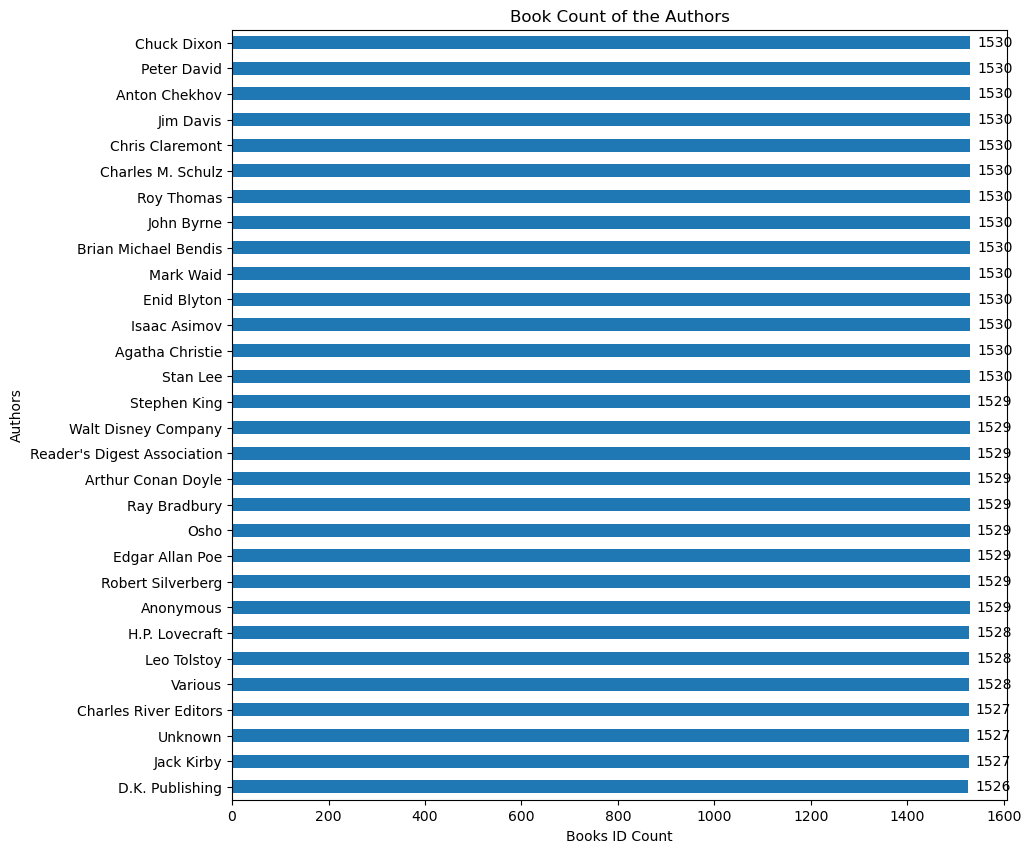

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
authors_df = authors_df.sort_values(by="book_id_count", ascending=True)
bar_width = 0.5
authors_df.tail(30)["book_id_count"].plot(kind="barh", width = bar_width)
plt.title("Book Count of the Authors")
plt.ylabel("Authors")
plt.xlabel("Books ID Count")
ax.bar_label(ax.containers[0], fmt="%d", padding=5)
plt.show()

Which book has the highest number of reviews?

In [6]:
highest_number_review = book_df['text_reviews_count'].max()
book_df[book_df["text_reviews_count"]==highest_number_review]["title"].iloc[0]

"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"

Which are the top ten and ten worst books concerning the average score?

In [7]:
book_df = book_df.sort_values(by='average_rating', ascending=False)
top_ten = book_df.head(10)[["title"]]
top_ten

,title
79248,Backlash Marriage: The Two Career Family Under...
94209,"Book XL (LIBER XL): Ab Vrbe Condita, book 40"
38882,Homenaje a Dulce Maria Loynaz: Premio Cervante...
18725,Pleasure Vessels: The Winners of the 1995 Ian ...
68029,L'Affaire Israel
38831,La Ceguera: Historia De Una Imagen Mental
68067,ALTERNATIVE FUTURE
68079,Visual Basic 2005 for Programmers [With CD-ROM]
94192,English/Turkish-Turkish/English Portable Techn...
68106,Cultural Readings of Imperialism


In [8]:
bottom_ten = book_df.tail(10)[["title"]]
bottom_ten

,title
43533,Symbol of Man
79320,Family & Fortune
67049,The Last Day of Summer
92953,Puras misturas: Estórias em Guimarães Rosa
17426,Dark Water
30153,The Rise and Growth of American Politics - A S...
30156,The Cost Of Our National Government.
79365,Forgotten Pleasures
97655,"Bow Wow!: Washington, DC Dogs in History, Mys..."
47958,Le Médecin Aujourd'hui


Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In [9]:
all_languages= list(book_df["language"].unique())
print (all_languages)

['', 'spa', 'eng', 'fre', 'ger', 'por', 'heb', 'en-GB', 'grc', 'bul', 'rus', 'pes', 'gre', 'en-US', 'afr', 'mul', 'kor', 'ita', 'tur', 'ara', 'jpn', 'per', 'zho', 'lat', 'dan', 'lit', 'sco', 'pol', 'wel', 'gla', 'gle', 'rum', 'ind', 'ale', 'hun', 'urd', 'nl', 'epo', 'en-CA', 'mar', 'swe', 'enm', 'isl', 'cze', 'fin', 'nor', 'kan', 'glg', 'vie', 'scr', 'msa', 'tlh', 'frs', 'srp', 'nno', 'cat', 'myn', '--', 'ang', 'ira', 'mun']


In [10]:
lang_count = []
for lang in all_languages:
    lang_count.append (book_df[book_df["language"] == lang].count()[0])
print (lang_count)

[55242, 3161, 32420, 1383, 1537, 213, 22, 1045, 26, 3, 112, 5, 7, 3870, 3, 61, 15, 188, 30, 29, 112, 204, 43, 14, 7, 2, 3, 24, 3, 1, 1, 3, 9, 1, 13, 4, 38, 1, 16, 1, 35, 8, 6, 3, 4, 11, 1, 9, 1, 1, 2, 1, 1, 2, 1, 21, 1, 1, 1, 1, 1]


In [11]:
lang_count_df = pd.DataFrame()
lang_count_df["Language"] = all_languages
lang_count_df["Count"] = lang_count
lang_count_df.loc[lang_count_df["Language"] == '', "Language"] = "Unidentified"
lang_count_df

,Language,Count
0,Unidentified,55242
1,spa,3161
2,eng,32420
3,fre,1383
4,ger,1537
...,...,...
56,myn,1
57,--,1
58,ang,1
59,ira,1


In [12]:
lang_count_df["Percentage"]= (lang_count_df["Count"]/ lang_count_df["Count"].sum())*100
lang_count_df = lang_count_df.sort_values(by="Count", ascending=False)

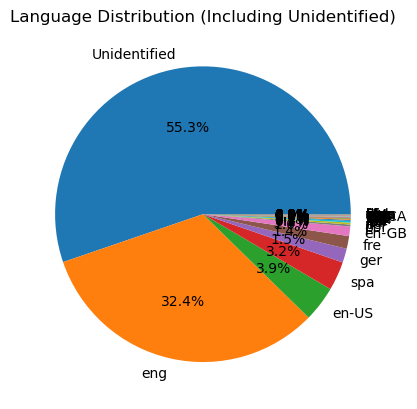

In [13]:
plt.pie(lang_count_df["Count"], labels=lang_count_df["Language"], autopct='%1.1f%%')
plt.title("Language Distribution (Including Unidentified)")
plt.show()

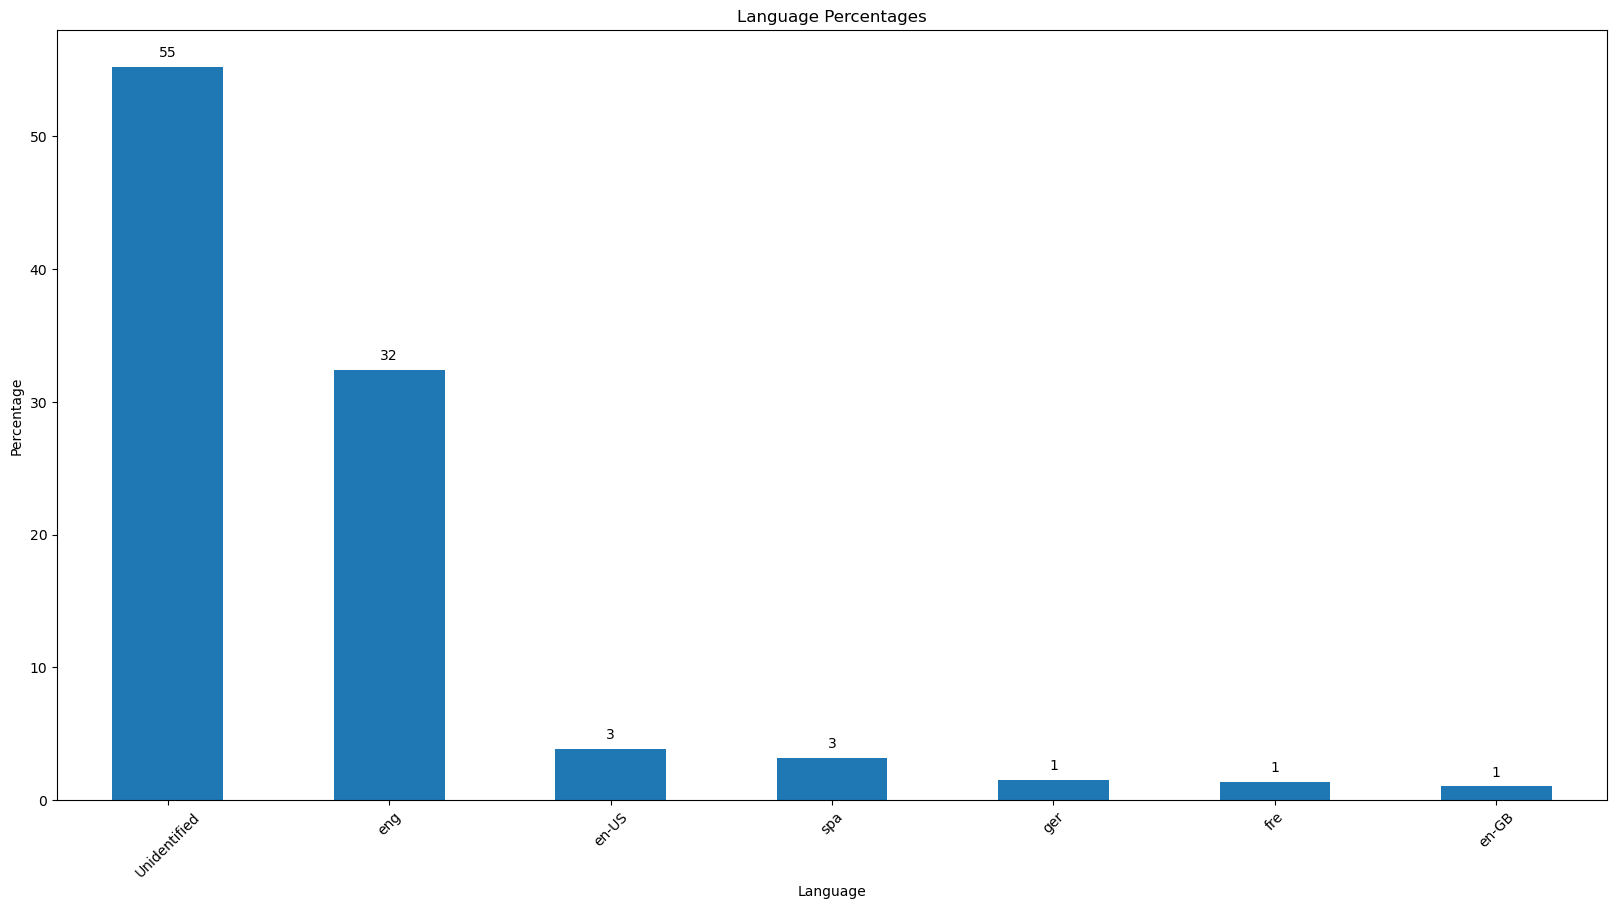

In [14]:
lang_count_df = lang_count_df.set_index('Language')
lang_count_no_zeros = lang_count_df[lang_count_df["Percentage"]>=1]

fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.5

lang_count_no_zeros['Percentage'].plot(kind='bar', width = bar_width)

plt.xticks(rotation=45)
plt.title('Language Percentages')
plt.ylabel('Percentage')
plt.xlabel('Language')
ax.bar_label(ax.containers[0], fmt='%d', padding=5)
plt.show()

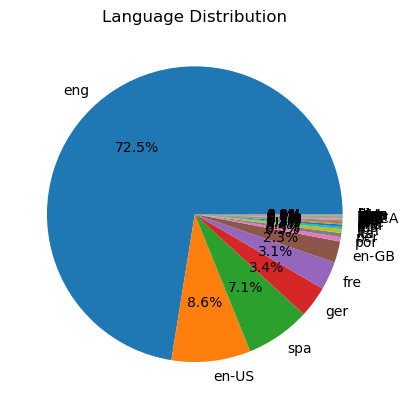

In [15]:
#Since there are too many "Unidentified" language in the dataset, we also plotted a pie chart with only the identified languages. 
lang_count_df = lang_count_df.reset_index()
lang_count_df2 = lang_count_df[lang_count_df["Language"]!="Unidentified"]
plt.pie(lang_count_df2["Count"], labels=lang_count_df2["Language"], autopct='%1.1f%%')
plt.title("Language Distribution")
plt.show()

How many books have more than 250 pages?

In [16]:
book_df2 = book_df[book_df['num_pages'] != ""]
book_df2.loc[:, "num_pages"] = book_df2["num_pages"].astype(int)

In [17]:
book_df2[book_df2['num_pages']> 250].count()[0]

41504

Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In [18]:
authors_df["work_id_count"] = authors_df["work_ids"].apply(lambda x: len(x))
authors_df = authors_df[authors_df["work_id_count"] == authors_df["book_id_count"]]
authors_df = authors_df.sort_values(by="book_id_count", ascending=False)
top_50_authors = authors_df.head(50)
#top_50_authors

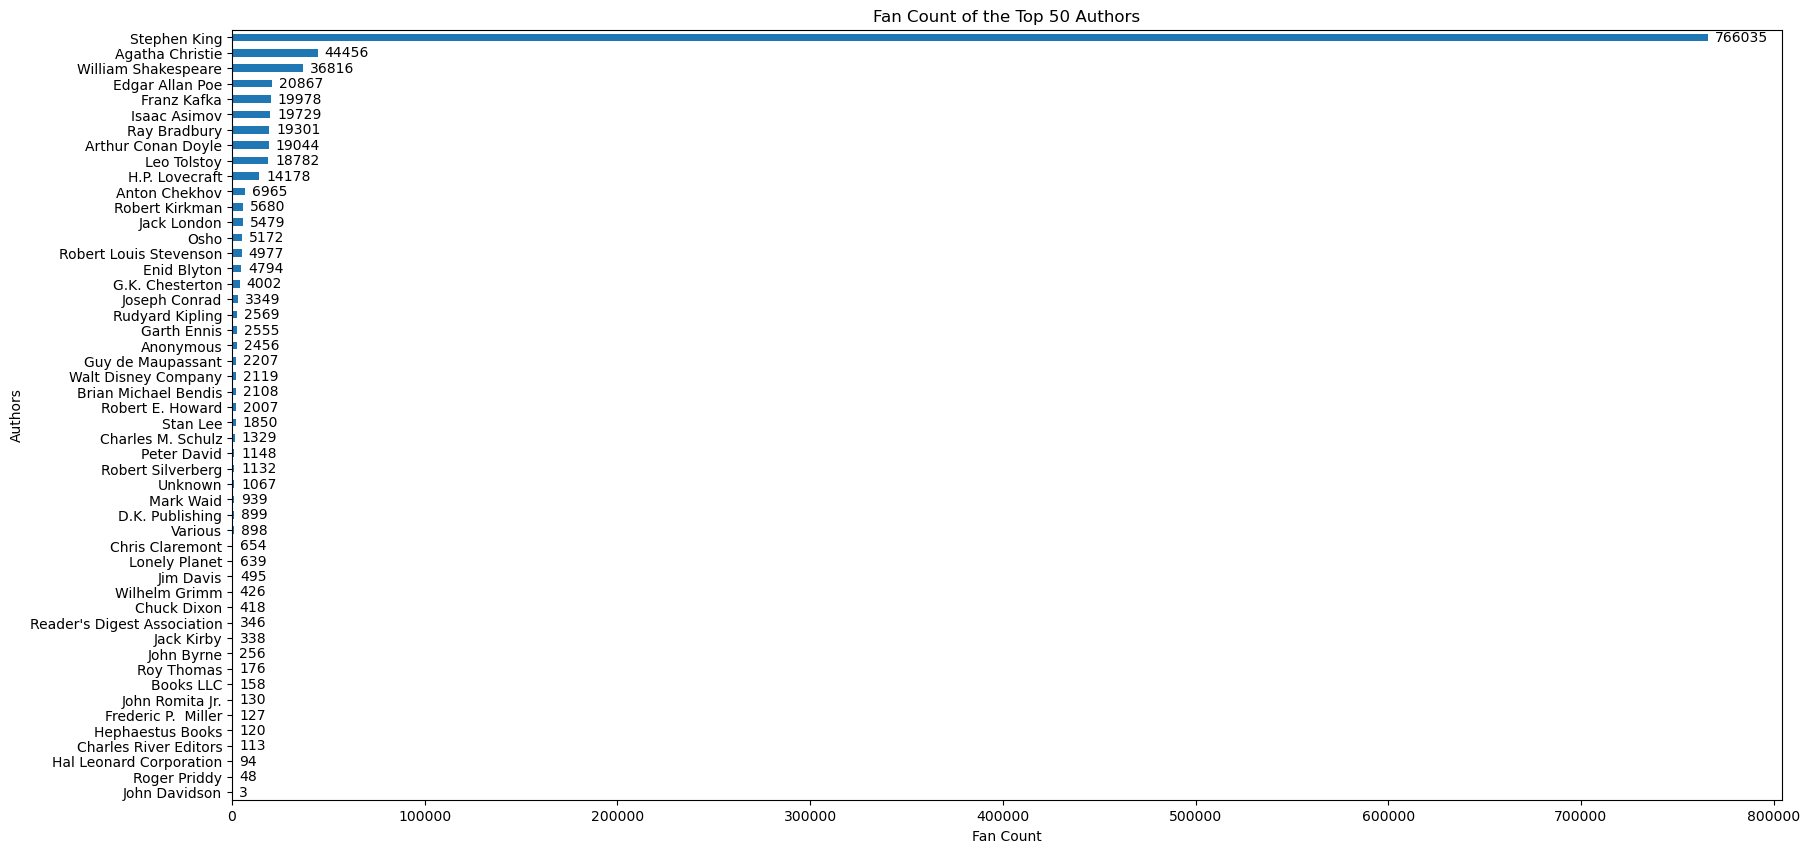

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
authors_df = authors_df.sort_values(by="book_id_count", ascending=True)
top_50_authors = top_50_authors.sort_values(by="fans_count", ascending=True)
bar_width = 0.5
top_50_authors["fans_count"].plot(kind="barh", width = bar_width)
plt.title("Fan Count of the Top 50 Authors")
plt.ylabel("Authors")
plt.xlabel("Fan Count")
ax.bar_label(ax.containers[0], fmt='%d', padding=5)
plt.show()

# RQ 3

Write a function that takes as input a year and returns as output the following information:
-The number of books published that year.
-The total number of pages written that year.
-The most prolific month of that year.
-The longest book written that year.

In [20]:
book_df = book_df.replace('', None)
book_df3 = book_df[book_df["original_publication_date"].notna()]
warnings.simplefilter("ignore")

#The following section is just to modify the original_publication_date column into a general format. It makes all the cells in the code in the YYYY-MM-DD format.
#For this purpose, it was assumed the cells that have only years (i.e: 1976) have the date of January 1st (i.e:1976-01-01)
#We got help from ChatGPT for this section. 
year_rows = book_df3['original_publication_date'].str.match(r'^\d{4}$')
book_df3.loc[year_rows, 'original_publication_date'] = book_df3.loc[year_rows, 'original_publication_date'] + "-01-01"
yyyy_mm_rows = book_df3['original_publication_date'].str.match(r'^\d{4}-\d{2}$')
book_df3.loc[yyyy_mm_rows, 'original_publication_date'] = book_df3.loc[yyyy_mm_rows, 'original_publication_date'] + "-01"
# Convert the 'publication_date_modified' column to datetime format
book_df3.loc[:, 'original_publication_date'] = pd.to_datetime(book_df3['original_publication_date'], format='%Y-%m-%d', errors='coerce')
# For dates without a time component, you can specify a different format
book_df3.loc[:,'original_publication_date'] = book_df3['original_publication_date'].combine_first(pd.to_datetime(book_df3['original_publication_date'], format='%Y-%m-%d'))

def extract_publication_year(row):
    try:
        return row.year
    except AttributeError:
        # Handle cases where it's not a valid datetime
        return None  # Use None for NaN values

# Apply the function to each element of the Series
book_df3.loc[:, "Original publication year"] = book_df3['original_publication_date'].apply(extract_publication_year)
warnings.resetwarnings()

In [21]:
# ASSUMPTION: the column with "original publication date" is considered as the publication date.
# ASSUMPTION 2: If the date is just a year (i.e: 2006), it is considered as 1 January 2006.

date_str = int (input("Enter a year"))
def year_summary (date):
    if date not in list(book_df3["Original publication year"]):
        return None
    book_df3["original_publication_date"]=  pd.to_datetime(book_df3["original_publication_date"], format="%Y/%m/%d")
    
    publication_number = book_df3[book_df3["Original publication year"]==date].count()[0]
    
    pages_sum = book_df3[book_df3["Original publication year"]==date]["num_pages"].sum()
    
    yearly_df= book_df3[book_df3["Original publication year"]==date]
    monthly_sum = yearly_df.groupby(yearly_df["original_publication_date"].dt.strftime("%B"))["title"].count().reset_index()
    monthly_sum.columns = ["Month", "Count"]
    monthly_sum = monthly_sum.sort_values(by="Count", ascending=False)
    most_prolific = monthly_sum.iloc[0][0]
    
    yearly_df = yearly_df.sort_values(by="num_pages", ascending=False)
    longest = yearly_df.head(1)[["title"]].iloc[0][0]
    
#    print ("The number of books published that year:", publication_number, 
#           "\nThe total number of pages written that year:", pages_sum,
#           "\nThe most prolific month of that year:", most_prolific,
#           "\nThe longest book written that year:", longest
#          )
    
    return date_str, publication_number , pages_sum, most_prolific, longest
year_summary (date_str)


Enter a year 2003


/tmp/ipykernel_8907/1696876220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df3["original_publication_date"]=  pd.to_datetime(book_df3["original_publication_date"], format="%Y/%m/%d")


(2003,
 4232,
 1022885,
 'January',
 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)')

Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [22]:
warnings.simplefilter("ignore")

unique_years = book_df3["Original publication year"].unique().tolist()
unique_years = sorted([y for y in unique_years if pd.notna(y)])

summary_df = pd.DataFrame(unique_years, columns=["Year"])
summary_df=summary_df[summary_df["Year"].notna()]

pub_num_list = []
page_num_list =[]
month_list = []
longest_book_list=[]

for y in unique_years:
    pub_num_list.append(year_summary(y)[1])
    page_num_list.append(year_summary(y)[2])
    month_list.append(year_summary(y)[3])
    longest_book_list.append(year_summary(y)[4])
summary_df["Number of Books Published"] = pub_num_list
summary_df["Total Number of Pages"] = page_num_list
summary_df["Most Prolific Month"] = month_list
summary_df["Longest Book"] = longest_book_list

warnings.resetwarnings()

summary_df

,Year,Number of Books Published,Total Number of Pages,Most Prolific Month,Longest Book
0,1678.0,10,2478,February,The Pilgrim's Progress
1,1680.0,2,1025,January,Discourses Concerning Government
2,1681.0,5,513,January,The Rover Or The Banished Cavaliers
3,1682.0,3,548,January,Dom Juan
4,1684.0,1,524,January,Love-Letters Between a Nobleman and His Sister
...,...,...,...,...,...
298,2016.0,5,983,May,Call of Cthulhu: Horror Roleplaying (Call of C...
299,2017.0,5,336,January,Lord Vishnu's Love Handles: A Spy Novel (Sort Of)
300,2018.0,1,224,January,Blue Beyond Blue: Extraordinary Tales for Ordi...
301,2019.0,3,993,August,Cuentos completos


In [23]:
summary_df.head(10)

,Year,Number of Books Published,Total Number of Pages,Most Prolific Month,Longest Book
0,1678.0,10,2478,February,The Pilgrim's Progress
1,1680.0,2,1025,January,Discourses Concerning Government
2,1681.0,5,513,January,The Rover Or The Banished Cavaliers
3,1682.0,3,548,January,Dom Juan
4,1684.0,1,524,January,Love-Letters Between a Nobleman and His Sister
5,1688.0,4,604,January,"Oroonoko, The Rover and Other Works"
6,1689.0,8,1426,January,Two Treatises of Government (Texts in the Hist...
7,1691.0,1,196,January,The Answer/La Respuesta: Including a Selection...
8,1692.0,6,647,January,The Practice of the Presence of God
9,1693.0,1,256,January,Some Thoughts Concerning Education/Of the Cond...


In [24]:
summary_df.tail(10)

,Year,Number of Books Published,Total Number of Pages,Most Prolific Month,Longest Book
293,2011.0,58,10539,January,"An Unfinished Life: John F. Kennedy, 1917-1963"
294,2012.0,69,26420,January,Collected Works of John Stuart Mill (8 Volumes)
295,2013.0,74,14289,September,Learning Python
296,2014.0,56,13516,January,"Der nackte Gott (Armageddon-Zyklus, #6)"
297,2015.0,45,14042,August,Austen Boxed Set
298,2016.0,5,983,May,Call of Cthulhu: Horror Roleplaying (Call of C...
299,2017.0,5,336,January,Lord Vishnu's Love Handles: A Spy Novel (Sort Of)
300,2018.0,1,224,January,Blue Beyond Blue: Extraordinary Tales for Ordi...
301,2019.0,3,993,August,Cuentos completos
302,2020.0,1,800,April,Set The Night On Fire: L.A. in the Sixties


#THE CHATGPT ANSWER
For the third part of the RQ3, ChatGPT is used as instructed. The code given by ChatGPT is below and it works almost correct. It can be seen the output is the same as the output above apart from the "Year" column. The correctness also examined by looking at random years and calculating the values with both the function and without the function.
We tried to correct the first column with more queries on ChatGPT but it stated that in order for it to make the code work, we should modify the year_summary function. However, this is not the assignment and as for our understanding the code does not need to work for this spesific question. 
We checked the correctness of the code with observation. The issue is obviously the code printing the first year for every row in the output dataframe. However, the other columns are correct.

In [25]:
warnings.simplefilter("ignore")

# Drop rows with non-finite values in the "Original publication year" column
book_df4 = book_df3.dropna(subset=['Original publication year'])

# Now, you can proceed with your code to convert the column to integers
book_df4['Original publication year'] = book_df4['Original publication year'].astype(int)

# Convert the "Original publication year" column to integers
book_df4['Original publication year'] = book_df4['Original publication year'].astype(int)

# Create a list of years to consider
years_between = list(range(book_df4['Original publication year'].min(), book_df4['Original publication year'].max() + 1))

# Rest of your code remains the same
year_summaries = [year_summary(year) for year in years_between if year_summary(year) is not None]
summarygpt_df = pd.DataFrame(year_summaries, columns=['Year', 'Books Published', 'Total Pages', 'Most Prolific Month', 'Longest Book'])

# Show the head and tail of the DataFrame for the first ten years and last ten years
print("Head (First 10 Years):")
print(summarygpt_df.head(10))
print("\nTail (Last 10 Years):")
print(summarygpt_df.tail(10))

warnings.resetwarnings()

Head (First 10 Years):
   Year  Books Published  Total Pages Most Prolific Month  \
0  2003               10         2478            February   
1  2003                2         1025             January   
2  2003                5          513             January   
3  2003                3          548             January   
4  2003                1          524             January   
5  2003                4          604             January   
6  2003                8         1426             January   
7  2003                1          196             January   
8  2003                6          647             January   
9  2003                1          256             January   

                                        Longest Book  
0                             The Pilgrim's Progress  
1                   Discourses Concerning Government  
2                The Rover Or The Banished Cavaliers  
3                                           Dom Juan  
4     Love-Letters Between a N

# RQ 4

You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [26]:
# Assumption: only the authors with the same exact name are eliminated.
authors_df = authors_df.reset_index()
authors_df = authors_df.drop_duplicates(subset="name", keep='first')

Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [27]:
input_str = input("Enter author ids (seperate each id with comma): ")
def author_dictionary(id_list):
    numbers = id_list.split(',')
    author_ids = []
    for num in numbers:
        author_ids.append(int(num))
    output_dict = {}
    for author_id in author_ids:
        given_author = authors_df[authors_df["id"] == author_id]["name"].iloc[0]
        output_dict[author_id] = list(book_df[book_df["author_name"] == given_author]["title"])
    return output_dict
author_dictionary(input_str)

Enter author ids (seperate each id with comma):  159,5363


{159: ['The Complete Letters of Henry James, 1855-1872: Volume 1',
  'Daniel Deronda: A Conversation',
  "Collected Stories, Vol. 2 (Everyman's Library)",
  'Novels 1901–1902: The Sacred Fount / The Wings of the Dove',
  'Complete Stories 1884–1891',
  'Complete Stories 1874–1884',
  'Complete Stories 1898–1910',
  'Literary Criticism, Vol 2: French Writers / Other European Writers / Prefaces to the New York Edition',
  'Henry James on Italy: Selections from Italian Hours',
  'Literary Criticism, Vol. 1: Essays on Literature / American Writers / English Writers',
  'Complete Stories 1892–1898',
  'Henry James: A Life in Letters',
  'Complete Stories 1864–1874',
  'Novels 1881–1886: Washington Square / The Portrait of a Lady / The Bostonians',
  'Novels 1886–1890: The Princess Casamassima / The Reverberator / The Tragic Muse',
  'Novels 1896–1899: The Other House / The Spoils of Poynton / What Maisie Knew / The Awkward Age',
  'The New York Stories of Henry James',
  'The Letters Of Hen

What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [28]:
top_20 = book_df.sort_values(by= "average_rating", ascending = False).head(20)
lengths=[]
for i in range(20):
    lengths.append(len(top_20["title"].iloc[i]))
max_length = max(lengths)
min_length = min(lengths)
for i in range(20):
    if len(top_20["title"].iloc[i])==max_length:
        print ("Longest Book Name Among Top 20 Authors: ", top_20.iloc[i]["title"])
    if len(top_20["title"].iloc[i])==min_length:
        print ("Shortest Book Name Among Top 20 Authors: ", top_20.iloc[i]["title"])

#The output is a little disorganized since there are two shortest books with the same length. 

Shortest Book Name Among Top 20 Authors:  The Umbrella Man
Longest Book Name Among Top 20 Authors:  Abstracts, References, & Key Words of Publications Relating to the Cotton Leafworm, Alabama Argillacea
Shortest Book Name Among Top 20 Authors:  The Myth of Mary


In [29]:
full_df_lengths= []
for i in range(len(book_df)):
    full_df_lengths.append(len(book_df["title"].iloc[i]))
full_list_max_length = max(full_df_lengths)
full_list_min_length = min(full_df_lengths)
for i in range(len(book_df)):
    if len(book_df["title"].iloc[i])==full_list_max_length:
        print ("Longest Book Name in the Full Dataset: ", book_df.iloc[i]["title"])
    if len(book_df["title"].iloc[i])==full_list_min_length:
        print ("Shortest Book Name Among Top 20 Authors: ", book_df.iloc[i]["title"])
# to check if this is the same as the one for the Top 20 authors
if max_length == full_list_max_length:
    print ("Yes, the longest book name is the same")
else: 
    print ("No, the longest book name is not the same")
    
if min_length == full_list_min_length:
    print ("Yes, the shortest book name is the same")
else: 
    print ("No, the shortest book name is not the same")
    
#The output is a little disorganized since there are multiple shortest and longest books with the same length. 

Longest Book Name in the Full Dataset:  A Commentary and Review of Montesquieu's Spirit of Laws, Prepared for Press from the Original Manuscript in the Hands of the Publisher (1811): To Which Are Annexed, Observations on the Thirty-First Book, by the Late M. Condorcet. and Two Letters of Hel...
Shortest Book Name Among Top 20 Authors:  Q
Shortest Book Name Among Top 20 Authors:  Q
Shortest Book Name Among Top 20 Authors:  Q
Shortest Book Name Among Top 20 Authors:  b
Shortest Book Name Among Top 20 Authors:  G
Shortest Book Name Among Top 20 Authors:  a
Longest Book Name in the Full Dataset:  Ensuring Compatibility with Enhanced 911 Emergency Calling Systems: A Progress Report: Hearing Before the Subcommittee on Telecommunications and the Internet of the Committee on Energy and Commerce, House of Representatives, One Hundred Seventh Congres...
Longest Book Name in the Full Dataset:  The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the

# RQ 5

Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [30]:
sorted_authors = authors_df.sort_values(by=["fans_count", "book_id_count"], ascending=[False, False])
print (sorted_authors.head(10)["name"])
print ("The most influential author is: ", sorted_authors.iloc[0]["name"])

351751           Stephen King
331640          Veronica Roth
250484            Bill  Gates
331844         Colleen Hoover
347791           Rick Riordan
351383        James Patterson
331808             John Green
329022    Neil deGrasse Tyson
348597        Cassandra Clare
269668           Mindy Kaling
Name: name, dtype: object
The most influential author is:  Stephen King


In [31]:
top_10_graph = sorted_authors.head(10)[["name", "fans_count", "book_id_count"]]

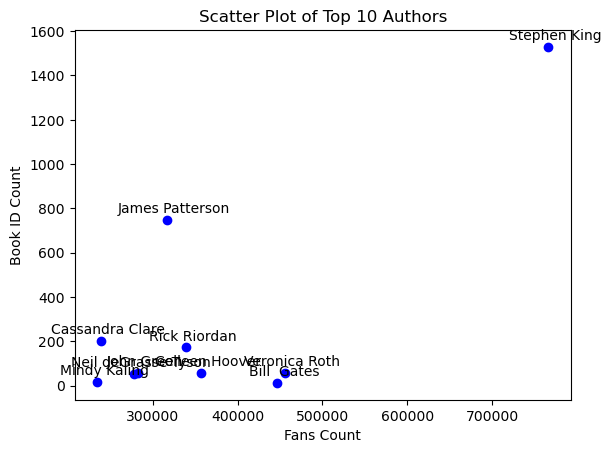

In [32]:
plt.scatter(top_10_graph["fans_count"], top_10_graph["book_id_count"], c="blue", marker="o")
#We took help from ChatGPT for the following for loop.
for i, name in enumerate(top_10_graph["name"]):
    plt.annotate(name, (top_10_graph["fans_count"].iloc[i], top_10_graph["book_id_count"].iloc[i]), textcoords="offset points", xytext=(5, 5), ha="center")
plt.xlabel("Fans Count")
plt.ylabel("Book ID Count")
plt.title("Scatter Plot of Top 10 Authors")
plt.show()

Have they published any series of books? If any, extract the longest series name among these authors.

In [33]:
non_null_series_id = [] 
for i in range(10):  
    author_name = sorted_authors.iloc[i]["name"]

    filtered_series_id = book_df[book_df["author_name"] == author_name]["series_id"]
    
    if not filtered_series_id.isnull().all():
        non_null_series_id.extend(filtered_series_id[filtered_series_id.notna()].tolist())

unique_ids= list(set(non_null_series_id))
book_names_list=[]
for j in unique_ids:
    book_names_list.append(book_df[book_df["series_id"]==j]["series_name"].iloc[0])

lengths=[]
for i in range(len(book_names_list)):
    lengths.append(len(book_names_list[i]))
max_length = max(lengths)

for i in range(len(book_names_list)):
    if len(book_names_list[i])==max_length:
        print ("Longest Series Name Among the 10 Most Influential Authors: ", book_names_list[i])

Longest Series Name Among the 10 Most Influential Authors:  Percy Jackson and the Olympians


How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

5 of the top 10 authors have published in more than one format.


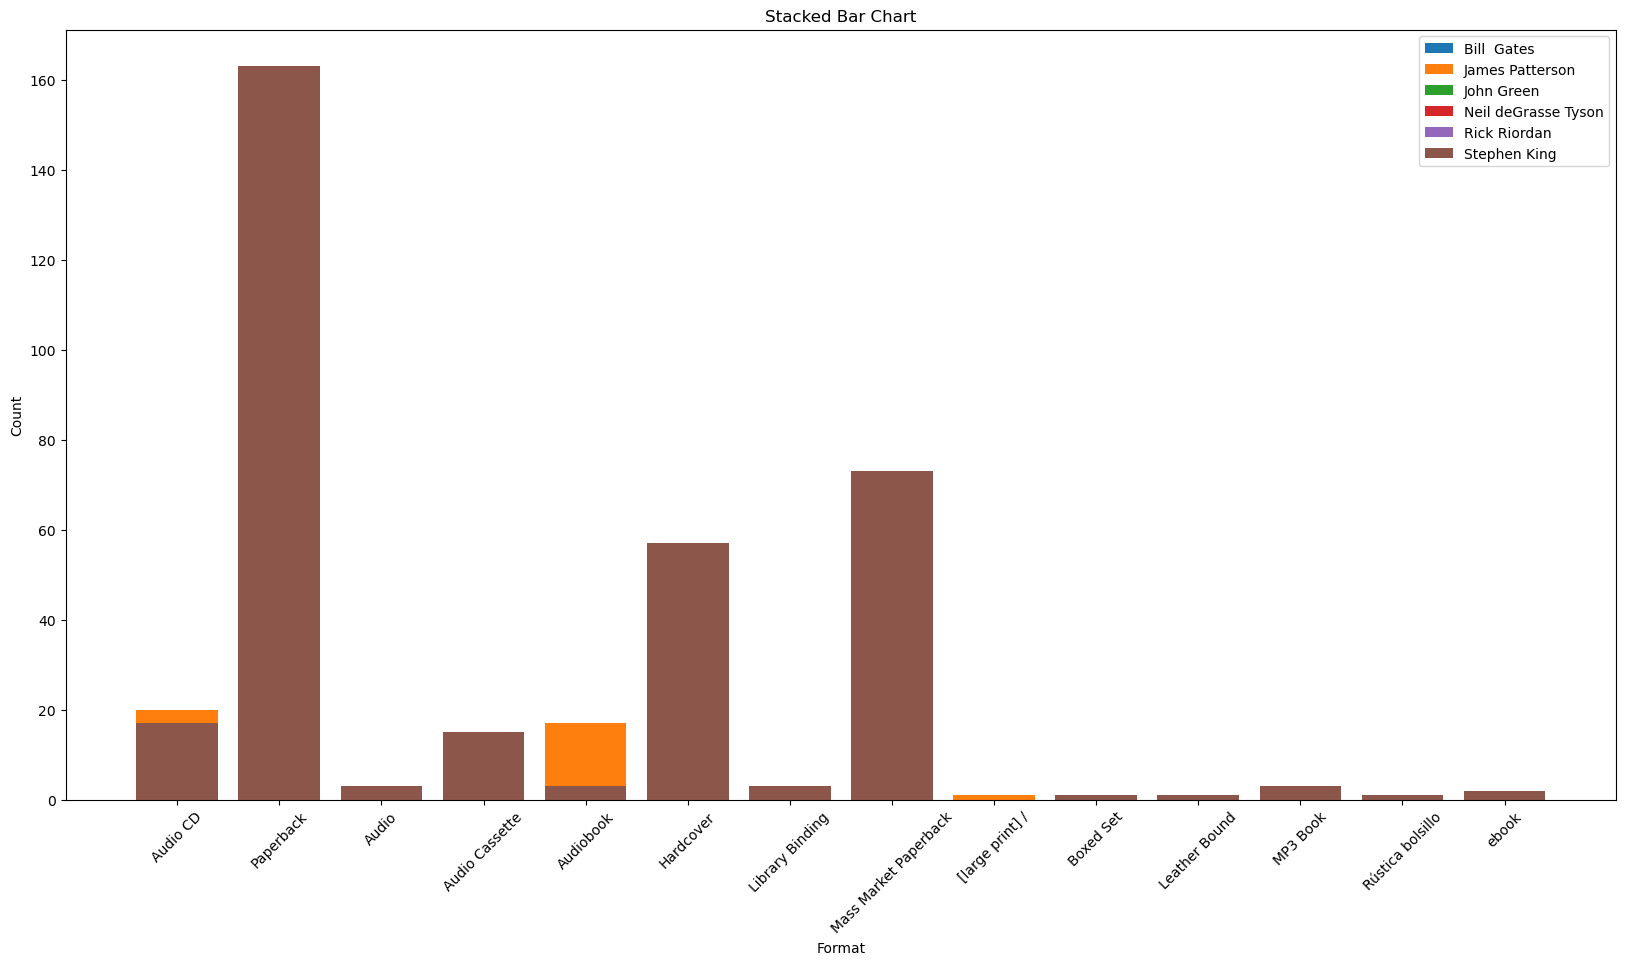

In [34]:
top_10_authors = sorted_authors.head(10) ####burayı en son 10 yap!!!!!!!!!
new_df = pd.DataFrame()
# We took help from ChatGPT for this part of the code.
for i in range(10):  
    author_name = top_10_authors.iloc[i]["name"]
    filtered_data = book_df[book_df["author_name"] == author_name][["author_name", "format"]]
    new_df = pd.concat([new_df, filtered_data])
grouped = new_df.groupby(['author_name', 'format']).size().reset_index(name='count')
grouped_df = pd.DataFrame(grouped)
more_than_one = len(grouped_df[grouped_df["count"]>1]["author_name"].unique())
print (more_than_one, "of the top 10 authors have published in more than one format.")

author_names = grouped_df["author_name"].unique()
formats = grouped_df["format"].unique()
data = []

for author in author_names:
    author_data = grouped_df[grouped_df["author_name"] == author]
    author_data = author_data.set_index("format")["count"]
    author_data = author_data.reindex(formats, fill_value=0)
    data.append(author_data.tolist())
fig, ax = plt.subplots(figsize=(20,10))

for i, author in enumerate(author_names):
    ax.bar(formats, data[i], label=author)

ax.set_xlabel("Format")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart")
ax.legend()

plt.xticks(rotation=45)
plt.show()

Since Stephen King has a lot more book_ids than any other authors in the list, the graph does not look so meaningful. Therefore, we can look at the data again without Stephen King. 

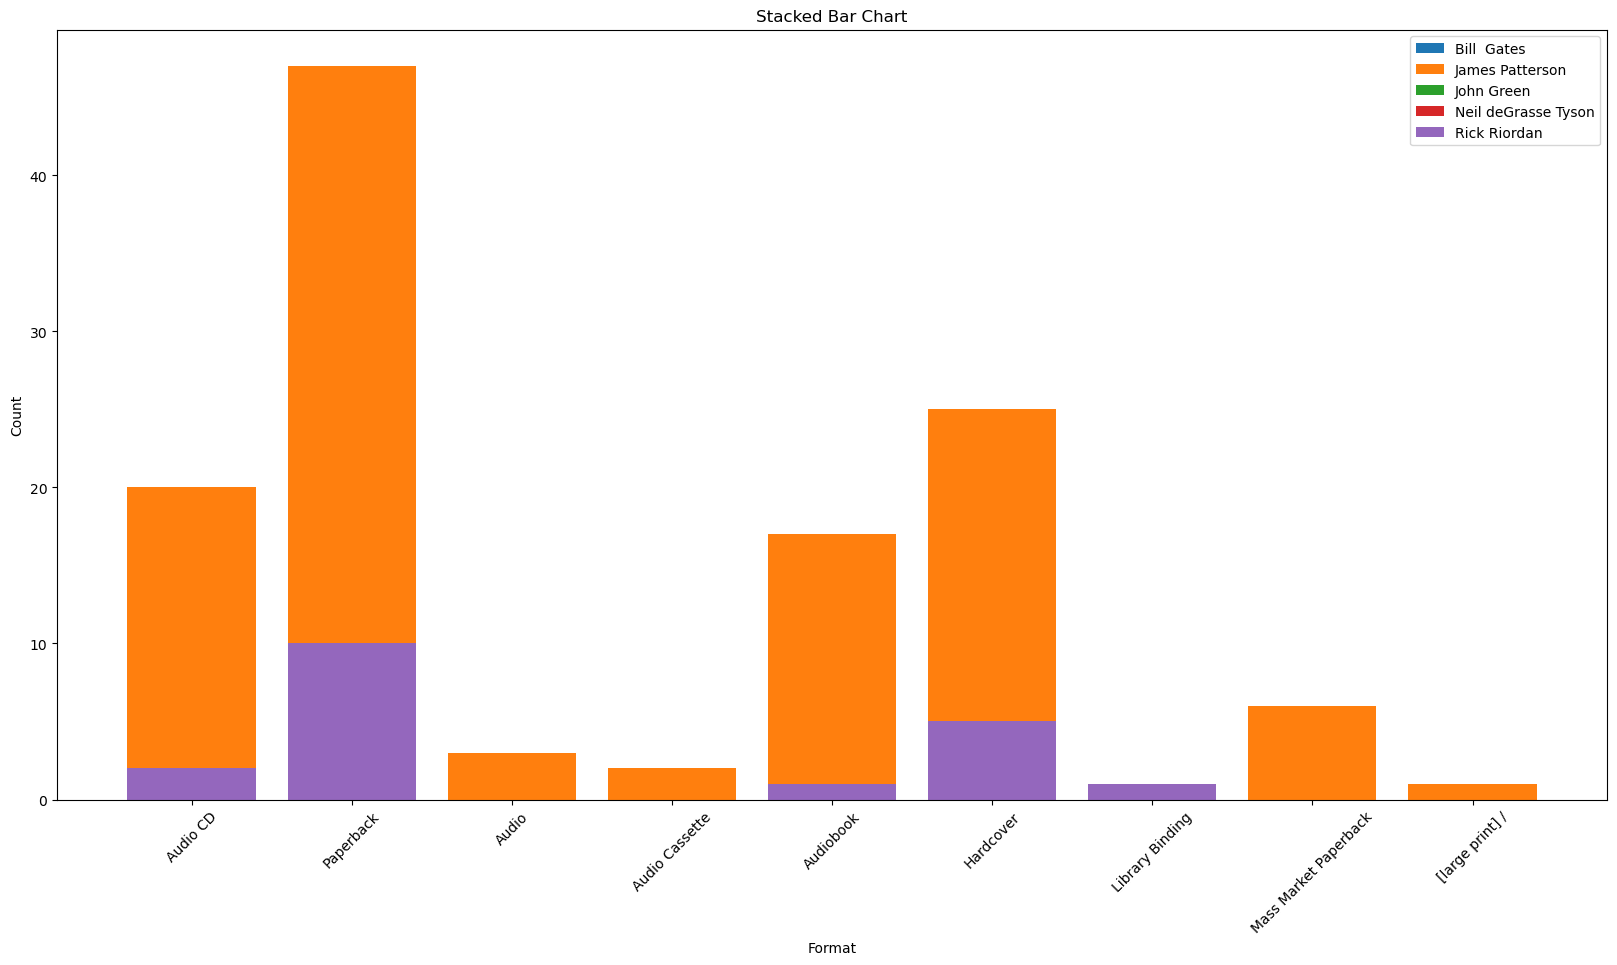

In [35]:
top_10_authors_no_stephen = top_10_authors.tail(9)
new_df = pd.DataFrame()
for i in range(9):  
    author_name = top_10_authors_no_stephen.iloc[i]["name"]
    filtered_data = book_df[book_df["author_name"] == author_name][["author_name", "format"]]
    new_df = pd.concat([new_df, filtered_data])
grouped = new_df.groupby(["author_name", "format"]).size().reset_index(name="count")
grouped_df = pd.DataFrame(grouped)

author_names = grouped_df["author_name"].unique()
formats = grouped_df["format"].unique()
data = []

for author in author_names:
    author_data = grouped_df[grouped_df["author_name"] == author]
    author_data = author_data.set_index("format")["count"]  # Set format as the index
    author_data = author_data.reindex(formats, fill_value=0)  # Reindex to ensure equal lengths
    data.append(author_data.tolist())

fig, ax = plt.subplots(figsize=(20,10))

for i, author in enumerate(author_names):
    ax.bar(formats, data[i], label=author)

ax.set_xlabel("Format")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart")
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [36]:
book_df[book_df["author_name"]=="Neil deGrasse Tyson"]["format"]

14779    Paperback
14778    Paperback
70487    Paperback
14781    Hardcover
14780    Paperback
Name: format, dtype: object

Now it is more clear that we have the format information about the books of only the 6 (including Stephen King) of the top 10 influencial authors. Since the number of books Neil deGrasse Tyson, John Green, and Bill Gates have published are low compared to the other authors, their information is not seen on the graph. For example, the above code line shows Neil deGrasse Tyson only published in the format of "Paperback" and "Hardcover". The other information are clear on the graph. 
It can be seen that most of the authors published in paperback format. The least preferred formats seem to be "Library Binding" and "[large print]"

Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

In [37]:
def clean_gender(gender):
    if gender.lower() == "male":
        return "Male"
    elif gender.lower() == "female":
        return "Female"
    else:
        return "Other"

authors_df["classified_gender"] = authors_df["gender"].apply(clean_gender)

In [38]:
authors_df_gender = authors_df.groupby(["classified_gender"]).agg({"fans_count": "mean", "average_rating": "mean", "text_reviews_count": "mean", "name":"count", "book_id_count": "sum"})
authors_df_gender

,fans_count,average_rating,text_reviews_count,name,book_id_count
classified_gender,,,,,
Female,180.613993,3.839917,506.964986,109871,1606819
Male,95.791797,3.606693,303.800605,138163,3081019
Other,59.592675,3.510546,180.644885,103696,1436216


In terms of structural bias, we would think female authors would have less fans and lower average ratings because women are more likely to get critized in a detailed manner. However, the above table shows that in our dataset, the women authors have significantly more fans and reviews than the male authors. Similary, womens' ratings are higher. However, although the number of female and male authors in the dataset is not far apart (109871 and 138163), the total number of books women have published is almost half of the total number of books men have published. 

# RQ 6

Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

In [39]:
merged_df = pd.merge(top_10_authors, book_df3, left_on="name", right_on="author_name", how="inner")
merged_df["name"].unique()
#Not all of the authors that are in the Top 10 list have data in the book dataset. So we will carry our 
#answer for only the ones that do have data in the books dataset.

array(['Stephen King', 'Bill  Gates', 'Rick Riordan', 'James Patterson',
       'John Green', 'Neil deGrasse Tyson'], dtype=object)

In [40]:
merged_df = merged_df.sort_values(by=["series_name", "series_position"], ascending=[False, False])

In [41]:
grouped_series = merged_df.groupby("series_name")
grouped_merged_series = grouped_series["original_publication_date"].apply(lambda x: x.diff().mean()).reset_index()
grouped_merged_series.columns = ["series name", "average_time_diff"]
grouped_merged_series["average_time_diff"] =grouped_merged_series["average_time_diff"].abs()
grouped_merged_series = grouped_merged_series.sort_values(by= "average_time_diff", ascending = False)
grouped_merged_series

,series name,average_time_diff
6,Merlin,3287 days 00:00:00
19,Tres Navarre,583 days 08:00:00
20,When the Wind Blows,421 days 06:00:00
17,The Talisman,362 days 01:24:42.352941176
12,The Dark Tower,194 days 00:00:00
0,Alex Cross,118 days 08:43:38.181818182
5,Maximum Ride,98 days 12:00:00
21,Women's Murder Club,98 days 01:02:36.521739130
9,Percy Jackson and the Olympians,55 days 04:48:00
13,The Green Mile,11 days 00:00:00


In [42]:
print ("The average time for all series is:", grouped_merged_series["average_time_diff"].sum() / grouped_merged_series["series name"].nunique())

The average time for all series is: 237 days 23:43:35.320749932


In [43]:
merged_df = merged_df.sort_values(by=["author_name", "original_publication_date"], ascending=[False, False])

In [44]:
grouped = merged_df.groupby("author_name")
grouped_merged = grouped["original_publication_date"].apply(lambda x: x.diff().mean()).reset_index()
grouped_merged.columns = ["author_name", "average_time_diff"]
grouped_merged["average_time_diff"] =grouped_merged["average_time_diff"].abs()
grouped_merged

,author_name,average_time_diff
0,Bill Gates,299 days 00:00:00
1,James Patterson,80 days 09:10:00
2,John Green,567 days 00:00:00
3,Neil deGrasse Tyson,1628 days 06:00:00
4,Rick Riordan,194 days 10:40:00
5,Stephen King,29 days 11:16:07.042889390


For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [46]:
year= int(input())
authors_and_years = merged_df.groupby(["name", "Original publication year"])["title"].count().reset_index()
for author in top_10_authors["name"]:
    a = authors_and_years[(authors_and_years["name"]==author) & (authors_and_years["Original publication year"]<=year)]["title"].sum()
    print (a)

 2003


429
0
5
0
5
92
0
3
0
0


In [47]:
authors_and_years = merged_df.groupby(["name", "Original publication year"])["title"].count().reset_index()
authors_and_years

,name,Original publication year,title
0,Bill Gates,1995.0,1
1,Bill Gates,1999.0,4
2,James Patterson,1976.0,2
3,James Patterson,1977.0,3
4,James Patterson,1979.0,1
...,...,...,...
66,Stephen King,2003.0,3
67,Stephen King,2004.0,8
68,Stephen King,2005.0,2
69,Stephen King,2006.0,4


In [48]:
authors_and_years[authors_and_years["name"]=="Stephen King"]["title"].sum()
# The total book_id count is different from the one i calculated for previos questions (named book_id_count) because there are non-matching
#values between the two datasets.

444

In [50]:
result_df = pd.DataFrame(columns=["year", "author", "sum"])

for year in authors_and_years["Original publication year"]:
    for author in top_10_authors["name"]:
        a = authors_and_years[(authors_and_years["name"]==author) & (authors_and_years["Original publication year"]<=year)]["title"].sum()
        result_df = pd.concat([result_df, pd.DataFrame({"year": [year], "author": [author], "sum": [a]})], ignore_index=True)
result_df

,year,author,sum
0,1995.0,Stephen King,316
1,1995.0,Veronica Roth,0
2,1995.0,Bill Gates,1
3,1995.0,Colleen Hoover,0
4,1995.0,Rick Riordan,0
...,...,...,...
705,2010.0,James Patterson,145
706,2010.0,John Green,2
707,2010.0,Neil deGrasse Tyson,5
708,2010.0,Cassandra Clare,0


In [51]:
authors_and_years["Original publication year"]

0     1995.0
1     1999.0
2     1976.0
3     1977.0
4     1979.0
       ...  
66    2003.0
67    2004.0
68    2005.0
69    2006.0
70    2010.0
Name: Original publication year, Length: 71, dtype: float64

In [52]:
# Group by "year" and "author" and calculate the sum
grouped_df = result_df.groupby(["year", "author"])["sum"].sum().unstack(fill_value=0)
grouped_df

author,Bill Gates,Cassandra Clare,Colleen Hoover,James Patterson,John Green,Mindy Kaling,Neil deGrasse Tyson,Rick Riordan,Stephen King,Veronica Roth
year,,,,,,,,,,
1974.0,0,0,0,0,0,0,0,0,21,0
1975.0,0,0,0,0,0,0,0,0,41,0
1976.0,0,0,0,2,0,0,0,0,41,0
1977.0,0,0,0,10,0,0,0,0,110,0
1978.0,0,0,0,5,0,0,0,0,87,0
1979.0,0,0,0,12,0,0,0,0,188,0
1980.0,0,0,0,20,0,0,0,0,218,0
1981.0,0,0,0,10,0,0,0,0,126,0
1982.0,0,0,0,10,0,0,0,0,160,0


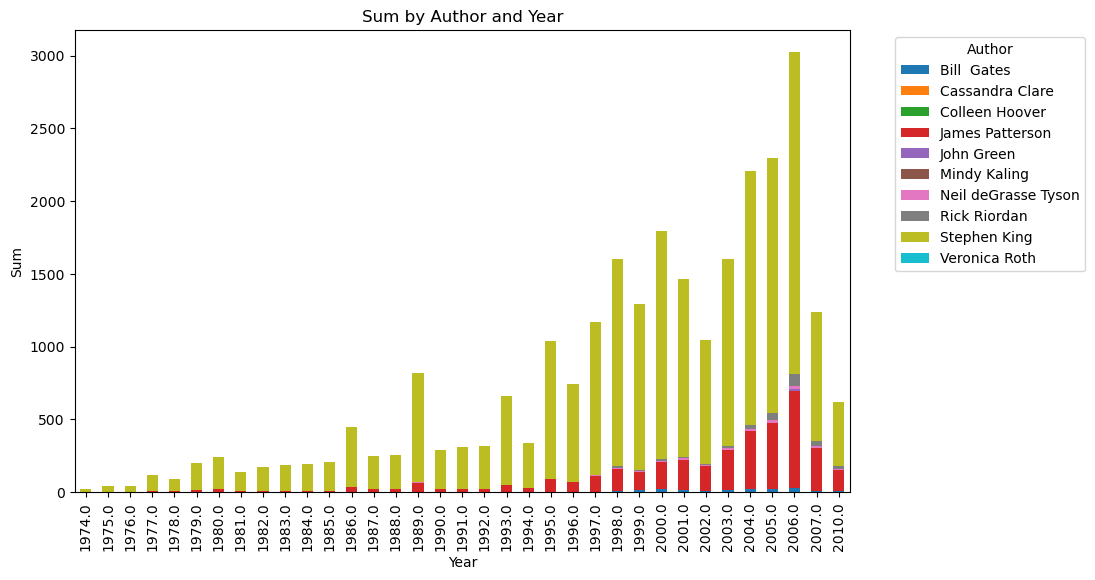

In [53]:
ax = grouped_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Sum")
plt.title("Sum by Author and Year")
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

It can be seen from the graph above that 2006 is the year that the number of books is higher. Other than that, Stephen King seems to be dominating the graph. But we can conclude that the authors are contemporary with each other since most of the information on the graph is from years between 1998 ad 2007.

# RQ7

Estimate the probability that a book has over 30% of the ratings above 4.

In [54]:
ratings_df = pd.DataFrame()
# We got help from ChatGPT for the following function.
def extract_data(cell):
    extracted_data = {}
    pairs = cell.split('|')
    for pair in pairs:
        key, value = pair.split(':')
        extracted_data[key] = value
    return pd.Series(extracted_data)

ratings_df = book_df["rating_dist"].apply(extract_data)
ratings_df = pd.concat([book_df, ratings_df], axis=1)

ratings_df


,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,series_name,series_position,shelves,description,5,4,3,2,1,total
79248,136953,Backlash Marriage: The Two Career Family Under...,None,Bebe Moore Campbell,7576,131987,5551631257,9785551631255,None,None,...,None,None,"[{'name': 'to-read', 'count': 38}]",None,1,0,0,0,0,1
94209,167925,"Book XL (LIBER XL): Ab Vrbe Condita, book 40","[{'id': '14577687', 'name': 'Livy', 'role': ''...",Livy,14577687,162186,0856686735,9780856686733,None,None,...,None,None,"[{'name': 'to-read', 'count': 2}]",Latin text with facing translation plus notes ...,1,0,0,0,0,1
38882,63077,Homenaje a Dulce Maria Loynaz: Premio Cervante...,"[{'id': '1078471', 'name': 'Dulce María Loynaz...",Dulce María Loynaz,1078471,61267,0897296699,9780897296694,None,None,...,None,None,"[{'name': 'to-read', 'count': 6}, {'name': 'po...",None,2,0,0,0,0,2
18725,28966,Pleasure Vessels: The Winners of the 1995 Ian ...,"[{'id': '1123252', 'name': 'Ian St. James Awar...",Ian St. James Awards,1123252,29441,1899860606,9781899860609,None,None,...,None,None,"[{'name': 'to-read', 'count': 10}]","Launched in 1988 by author Ian St James, this ...",2,0,0,0,0,2
68029,115644,L'Affaire Israel,None,Roger Garaudy,67024,111368,2865410439,9782865410439,None,None,...,None,None,"[{'name': 'to-read', 'count': 11}]",None,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30153,48350,The Rise and Growth of American Politics - A S...,None,Henry Jones Ford,15466027,42450296,1846645069,9781846645068,None,None,...,None,None,"[{'name': 'to-read', 'count': 8}]",Originally published in 1898. Author: Henry Jo...,0,0,0,0,0,0
30156,48353,The Cost Of Our National Government.,None,Henry Jones Ford,15466027,51132201,0405058691,9780405058691,None,None,...,None,None,"[{'name': 'to-read', 'count': 2}]",This work has been selected by scholars as bei...,0,0,0,0,0,0
79365,137142,Forgotten Pleasures,None,Rita Rudner,79357,132173,0140049320,9780140049329,None,None,...,None,None,"[{'name': 'to-read', 'count': 6}]",None,0,0,0,0,0,0
97655,175230,"Bow Wow!: Washington, DC Dogs in History, Mys...",None,Carole Marsh,14372,169279,0793334926,9780793334926,None,None,...,None,None,"[{'name': 'to-read', 'count': 2}]",None,0,0,0,0,0,0


In [55]:
ratings_df["5"] = pd.to_numeric(ratings_df["5"], errors="coerce").astype(int)
ratings_df["4"] = pd.to_numeric(ratings_df["4"], errors="coerce").astype(int)
ratings_df["3"] = pd.to_numeric(ratings_df["3"], errors="coerce").astype(int)
ratings_df["2"] = pd.to_numeric(ratings_df["2"], errors="coerce").astype(int)
ratings_df["1"] = pd.to_numeric(ratings_df["1"], errors="coerce").astype(int)
ratings_df["total"] = pd.to_numeric(ratings_df["total"], errors="coerce").astype(int)

In [56]:
ratio = (ratings_df["5"] + ratings_df["4"])/ratings_df["total"]
ratio = ratio.dropna()
ratio

79248    1.0
94209    1.0
38882    1.0
18725    1.0
68029    1.0
        ... 
35963    0.0
53431    0.0
44313    0.0
72672    0.0
60662    0.0
Length: 97661, dtype: float64

In [57]:
probability = (ratio > 0.30).mean()
print ("The probability that a book has over 30% of the ratings above 4 is ", probability)

The probability that a book has over 30% of the ratings above 4 is  0.9793059665577867


Estimate the probability that an author publishes a new book within two years from its last work.

In [58]:
full_merged_df = pd.merge(authors_df, book_df, left_on='id', right_on='author_id', how='inner')
full_merged_df.columns

Index(['name', 'ratings_count_x', 'average_rating_x', 'text_reviews_count_x',
       'work_ids', 'book_ids', 'works_count', 'id_x', 'gender', 'image_url_x',
       'about', 'fans_count', 'book_id_count', 'work_id_count',
       'classified_gender', 'id_y', 'title', 'authors', 'author_name',
       'author_id', 'work_id', 'isbn', 'isbn13', 'asin', 'language',
       'average_rating_y', 'rating_dist', 'ratings_count_y',
       'text_reviews_count_y', 'publication_date', 'original_publication_date',
       'format', 'edition_information', 'image_url_y', 'publisher',
       'num_pages', 'series_id', 'series_name', 'series_position', 'shelves',
       'description'],
      dtype='object')

In [59]:
full_merged_df = full_merged_df[full_merged_df["original_publication_date"].notna()]
year_rows = full_merged_df["original_publication_date"].str.match(r'^\d{4}$')
full_merged_df.loc[year_rows, "original_publication_date"] = full_merged_df.loc[year_rows, "original_publication_date"] + "-01-01"
yyyy_mm_rows = full_merged_df["original_publication_date"].str.match(r'^\d{4}-\d{2}$')
full_merged_df.loc[yyyy_mm_rows, "original_publication_date"] = full_merged_df.loc[yyyy_mm_rows, "original_publication_date"] + "-01"
full_merged_df.loc[:, "original_publication_date"] = pd.to_datetime(full_merged_df["original_publication_date"], format='%Y-%m-%d', errors="coerce")
full_merged_df.loc[:,"original_publication_date"] = full_merged_df["original_publication_date"].combine_first(pd.to_datetime(full_merged_df["original_publication_date"], format='%Y-%m-%d'))

def extract_publication_year(row):
    try:
        return row.year
    except AttributeError:
        return None

full_merged_df.loc[:, "Original publication year"] = full_merged_df['original_publication_date'].apply(extract_publication_year)

In [60]:
full_merged_df = full_merged_df.sort_values(by=["name", "Original publication year"], ascending=[False, True])

In [61]:
full_merged_df['year_difference'] = full_merged_df.groupby('name')['Original publication year'].diff()
full_merged_df[["name", "id_y", "Original publication year", "year_difference"]]

,name,id_y,Original publication year,year_difference
27159,西西,39614,1997.0,NaN
505,இளங்கோ அடிகள்,10364,1892.0,NaN
2356,یعقوب یادعلی,157456,2004.0,NaN
22432,گیتا گرکانی,163007,2006.0,NaN
10715,نوشین احمدی خراسانی,151358,2003.0,NaN
...,...,...,...,...
11980,A. Adu Boahen,142003,1985.0,NaN
67843,A&C Black,87685,1951.0,NaN
67842,A&C Black,87684,1998.0,47.0
67844,A&C Black,87686,1998.0,0.0


In [62]:
ratio = len(full_merged_df[full_merged_df['year_difference']<=2]) / len(full_merged_df)
print("The probability that an author publishes a new book within two years from its last work is ", ratio)

The probability that an author publishes a new book within two years from its last work is  0.5836578674256826


In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [63]:
worst_df = pd.read_json("worst_books.json", lines=True)

In [64]:
original_data=list((worst_df["books"]))

In [65]:
# We took help from ChatGPT for the next line. 
restructured_data = {entry['book_id']: {key: entry[key] for key in entry if key != 'book_id'} for entry in original_data[0]}
worst_books_df = pd.DataFrame(restructured_data)
worst_books_df = worst_books_df.transpose()
worst_books_df.reset_index(inplace=True)
worst_books_df.rename(columns={'index': 'book_id'}, inplace=True)
worst_books_df

,book_id,title,author_id,author,position
0,41865,Twilight,941441,Stephenie Meyer,"{'ranking': 1, 'score': 527144, 'votes': 5303}"
1,1162543,Breaking Dawn,941441,Stephenie Meyer,"{'ranking': 2, 'score': 400813, 'votes': 4061}"
2,49041,New Moon,941441,Stephenie Meyer,"{'ranking': 3, 'score': 356742, 'votes': 3648}"
3,428263,Eclipse,941441,Stephenie Meyer,"{'ranking': 4, 'score': 323657, 'votes': 3338}"
4,10818853,Fifty Shades of Grey,4725841,E.L. James,"{'ranking': 5, 'score': 231106, 'votes': 2356}"
...,...,...,...,...,...
7388,30317417,Most Dangerous Place,27572,James Grippando,"{'ranking': 7389, 'score': 2, 'votes': 1}"
7389,40139233,Sacred Duty: A Soldier's Tour at Arlington Nat...,7742817,Tom Cotton,"{'ranking': 7390, 'score': 2, 'votes': 1}"
7390,176392,Who Stole Feminism? How Women Have Betrayed Women,393,Christina Hoff Sommers,"{'ranking': 7391, 'score': 1, 'votes': 1}"
7391,1318015,"Woulda, Coulda, Shoulda: Overcoming Regrets, M...",48336,Arthur Freeman,"{'ranking': 7392, 'score': 1, 'votes': 1}"


In [66]:
more_than_700 = book_df[book_df["num_pages"]>700]
more_than_700

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
83965,146490,Great American Novels (5 Vols.),"[{'id': '19879', 'name': 'Stephen Crane', 'rol...",Stephen Crane,19879,141372,0486286657,9780486286655,None,None,...,Paperback,None,https://s.gr-assets.com/assets/nophoto/book/11...,Dover Publications,720,None,None,None,"[{'name': 'to-read', 'count': 9}]","The Red Badge of Courage, The Scarlet Letter; ..."
67419,114419,Kiss Your Fat Goodbye: The Ultimate Guide to L...,None,Gary Null,104490,110177,0767925173,9780767925174,None,None,...,Paperback,None,https://i.gr-assets.com/images/S/compressed.ph...,Harmony,720,None,None,None,"[{'name': 'to-read', 'count': 6}]",Leading natural health expert Gary Null has de...
84225,147088,Selected Essays,"[{'id': '3909056', 'name': 'Vsevolod Pudovkin'...",Vsevolod Pudovkin,3909056,141958,1905422245,9781905422241,None,None,...,Paperback,None,https://i.gr-assets.com/images/S/compressed.ph...,Seagull Books,816,None,None,None,"[{'name': 'to-read', 'count': 17}, {'name': 'f...",Vsevolod Pudovkin (1893-1953) was one of the l...
18068,27952,The Presidential Recordings: Lyndon B. Johnson...,"[{'id': '92904', 'name': 'Ernest R. May', 'rol...",Ernest R. May,92904,28548,0393060012,9780393060010,None,None,...,Hardcover,None,https://s.gr-assets.com/assets/nophoto/book/11...,W. W. Norton & Company,1184,173180,WW Norton Presidential Recordings,None,"[{'name': 'to-read', 'count': 22}]",Lyndon B. Johnson secretly recorded 700 hours ...
66263,112168,The Notebooks of Samuel Taylor Coleridge: 1827...,"[{'id': '11525', 'name': 'Samuel Taylor Coleri...",Samuel Taylor Coleridge,11525,108003,0691099073,9780691099071,None,None,...,Hardcover,None,https://s.gr-assets.com/assets/nophoto/book/11...,Princeton University Press,1923,None,None,None,"[{'name': 'to-read', 'count': 6}]",This final volume of Bollingen Series L covers...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92190,163161,"2006 Iranian Nuclear Showdown: Iran, Nuclear T...",None,U.S. Congress,5107074,157495,1422005003,9781422005002,None,eng,...,CD-ROM,None,https://s.gr-assets.com/assets/nophoto/book/11...,Progressive Management,63987,None,None,None,"[{'name': 'to-read', 'count': 2}]",This unique electronic book on CD-ROM has a co...
41378,67349,Man's Peril 1954-55 (Collected Papers of Bertr...,"[{'id': '17854', 'name': 'Bertrand Russell', '...",Bertrand Russell,17854,3672811,0415094240,9780415094245,None,None,...,Hardcover,None,https://s.gr-assets.com/assets/nophoto/book/11...,Routledge,792,None,None,None,"[{'name': 'to-read', 'count': 11}]",<em>The Collected Papers 28 </em>signals reinv...
98312,176512,Writings in Periodicals: Selections from the C...,None,W.E.B. Du Bois,10710,170541,0527253510,9780527253516,None,None,...,Hardcover,None,https://s.gr-assets.com/assets/nophoto/book/11...,None,782,None,None,None,"[{'name': 'to-read', 'count': 7}]",None
43258,70601,Writings on Evolution 1843-1912 (Evolution & A...,"[{'id': '32343', 'name': 'Alfred Russel Wallac...",Alfred Russel Wallace,32343,68411,1843710498,9781843710493,None,eng,...,cloth,None,https://s.gr-assets.com/assets/nophoto/book/11...,Thoemmes,1464,None,None,None,"[{'name': 'to-read', 'count': 4}]",Alfred Russel Wallace (1823-1913) was one of t...


In [67]:
worst_books_df["book_id"] = worst_books_df["book_id"].astype('int64')
more_than_700['id'] = more_than_700['id'].astype('int64')
worst_and_700_df = pd.merge(worst_books_df, more_than_700, left_on='book_id', right_on='id', how='inner')

/tmp/ipykernel_8907/2433750413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_700['id'] = more_than_700['id'].astype('int64')


In [68]:
prob_q = len(worst_and_700_df) / len(more_than_700)
print ("The probability of a book being included in this list, knowing it has more than 700 pages is :", prob_q)

The probability of a book being included in this list, knowing it has more than 700 pages is : 0.03758020164986251


Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [69]:
in_the_worst = pd.merge(worst_books_df, book_df, left_on='book_id', right_on='id', how='inner')

In [71]:
prob_x = len(in_the_worst)/len(book_df)
prob_y =len(more_than_700)/len(book_df)
if (prob_x * prob_y == prob_q):
    print ("Yes, they are independent")
else:
    print ("No, they are not independent")
#To check independency, we used the fact that if A and B are independent events, the following statement has to be true: 
# P(A ∩ B) = P(A) * P(B).

No, they are not independent


# RQ 8

Can you demonstrate that readers usually rate the longest books as the worst?

In [72]:
in_the_worst.columns

Index(['book_id', 'title_x', 'author_id_x', 'author', 'position', 'id',
       'title_y', 'authors', 'author_name', 'author_id_y', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')

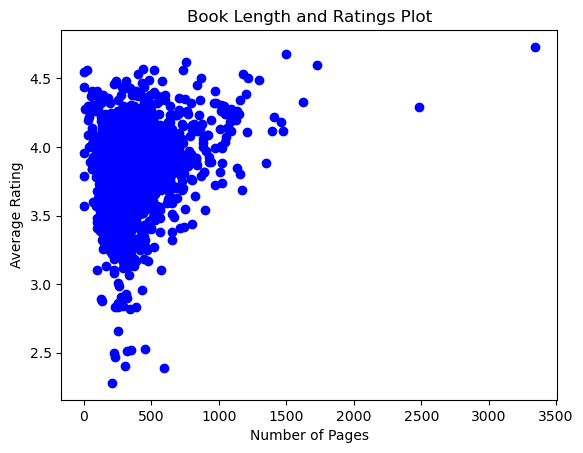

In [75]:
plt.scatter(in_the_worst["num_pages"], in_the_worst["average_rating"], color="b", marker="o")
plt.title("Book Length and Ratings Plot")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.show()

In [76]:
# We can see from the graph above that generally, higher number of pages indicates higher rating. It is not always true though. 

Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [77]:
english = book_df[book_df["language"]=="eng"]
non_english = book_df[book_df["language"]!="eng"]

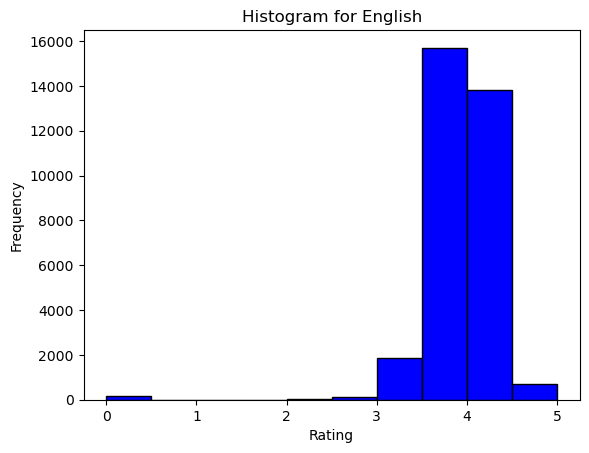

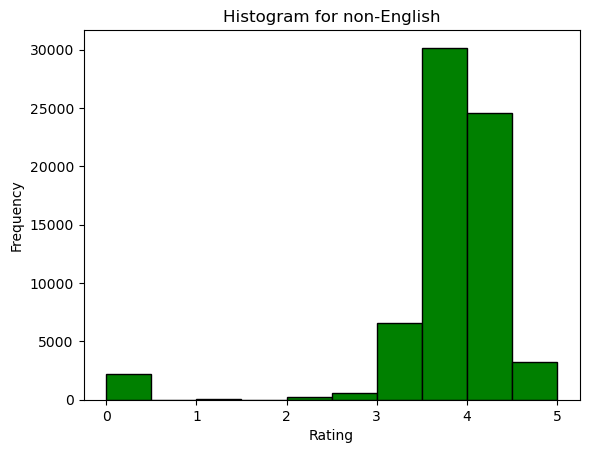

In [78]:
plt.hist(english["average_rating"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Histogram for English')
plt.show()
plt.hist(non_english["average_rating"], bins=10, color="green", edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Histogram for non-English')
plt.show()

In [79]:
ks_statistic, p_value = stats.ks_2samp(english["average_rating"], non_english["average_rating"])
print("K-S Statistic:", ks_statistic)
print("P-Value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The two samples have different distributions.")
else:
    print("Fail to reject the null hypothesis: The two samples have similar distributions.")
# Although the histograms look similar, the results of the Kolmogorov-Smirnov test suggest the distributions for English and non-English 
# books are different. 

K-S Statistic: 0.09965003501968986
P-Value: 7.832692585947146e-190
Reject the null hypothesis: The two samples have different distributions.


About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [80]:
english_ratings = english[["average_rating"]]
non_english_ratings = non_english[["average_rating"]]

In [81]:
print ("Mode for English:", english_ratings.mode()["average_rating"][0])
print ("Mode for non-English:", non_english_ratings.mode()["average_rating"][0])
print ("Mean for English:", english_ratings.mean()["average_rating"])
print ("Mean for non-English:", non_english_ratings.mean()["average_rating"])
print ("Median for English:", english_ratings.median()["average_rating"])
print ("Median for non-English:", non_english_ratings.median()["average_rating"])
print ("First Quartile for English:", np.percentile(english_ratings["average_rating"], 25))
print ("First Quartile for non-English:", np.percentile(non_english_ratings["average_rating"], 25))
print ("Third Quartile for English:", np.percentile(english_ratings["average_rating"], 75))
print ("Third Quartile for non-English:", np.percentile(non_english_ratings["average_rating"], 75))

Mode for English: 4.0
Mode for non-English: 4.0
Mean for English: 3.928797964219618
Mean for non-English: 3.778286365520099
Median for English: 3.96
Median for non-English: 3.92
First Quartile for English: 3.7800000000000002
First Quartile for non-English: 3.67
Third Quartile for English: 4.14
Third Quartile for non-English: 4.13


In [82]:
new_dataframe = pd.concat([english_ratings["average_rating"], non_english_ratings["average_rating"]], axis=1, keys=["English_ratings", "Non_english_ratings"])
new_dataframe

,English_ratings,Non_english_ratings
94325,5.0,NaN
10092,5.0,NaN
10178,5.0,NaN
39242,5.0,NaN
94001,5.0,NaN
...,...,...
30153,NaN,0.0
30156,NaN,0.0
79365,NaN,0.0
97655,NaN,0.0


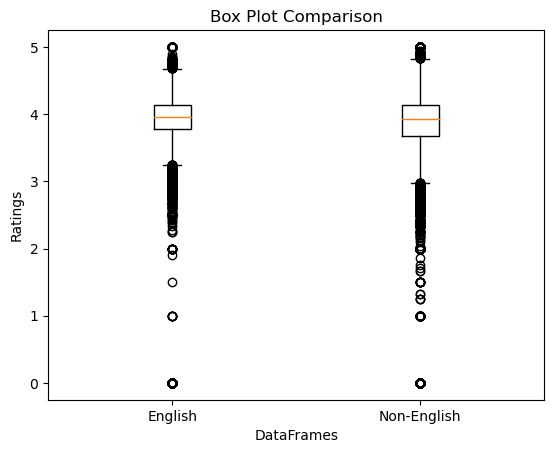

In [83]:
data_to_plot = [english_ratings["average_rating"], non_english_ratings["average_rating"]]
fig, ax = plt.subplots()
ax.boxplot(data_to_plot, labels=["English", "Non-English"])
ax.set_xlabel("DataFrames")
ax.set_ylabel("Ratings")
ax.set_title("Box Plot Comparison")
plt.show()
# The box plot shows although the average rating does not differ very much for english and non-english books; 
#the range of ratings for non_english books are wider than those for english books.
# The medians are shown as the lines inside the boxes. The quartiles are the outside lines of the boxes. The mode and mean are not shown
# in the plot. 

It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [84]:
fans_reviews = authors_df[["fans_count", "text_reviews_count"]]

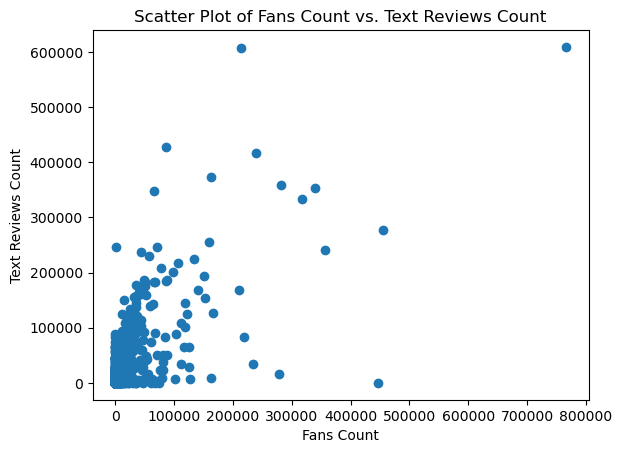

In [85]:
plt.scatter(fans_reviews['fans_count'], fans_reviews['text_reviews_count'])

plt.xlabel('Fans Count')
plt.ylabel('Text Reviews Count')
plt.title('Scatter Plot of Fans Count vs. Text Reviews Count')

plt.show()

In [86]:
correlation, _ = pearsonr(fans_reviews['fans_count'], fans_reviews['text_reviews_count'])

In [87]:
correlation

0.6942744082568757

Since correlation is close to 1, we can conclude the statement is not true (in other words: authors with more fans receive more reviews. This also can be seen on the graph above. However, since the correlation is not exactly 1 or really close to 1, we cannot conclude they are 100% relational. 

Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

**Helpful Statistical Tests:**
**T-Tests:** Used to compare means of two groups.
**ANOVA (Analysis of Variance):** Used for comparing means of more than two groups.
**Chi-Square Test:** Used for testing relationships between categorical variables.
**Regression Analysis:** Used to explore relationships and make predictions.
**Mann-Whitney U Test and Kruskal-Wallis Test:** Nonparametric alternatives to t-tests and ANOVA when assumptions of normality are violated.

**Parametric and Nonparametric Tests:**
**Parametric Tests:** These tests assume that the data follows a specific distribution, typically a normal distribution.Parametric tests include t-tests and ANOVA.
**Nonparametric Tests:** Nonparametric tests are distribution-free and do not assume a particular distribution. Nonparametric tests include Mann-Whitney U and Wilcoxon signed-rank tests.

The selection of parametric or nonparametric tests is mainly about the data distribution. If the data follows a normal distribution, parametric tests are preferred. Additionally, nonparametric tests are often preferred with small samples.

## Command Line Question (CLQ) 
#### 1.The script is written in commandline_original.sh file with .sh extension. After running the shell script from command line by executing command “./ commandline_original.sh” output is shown as follows:


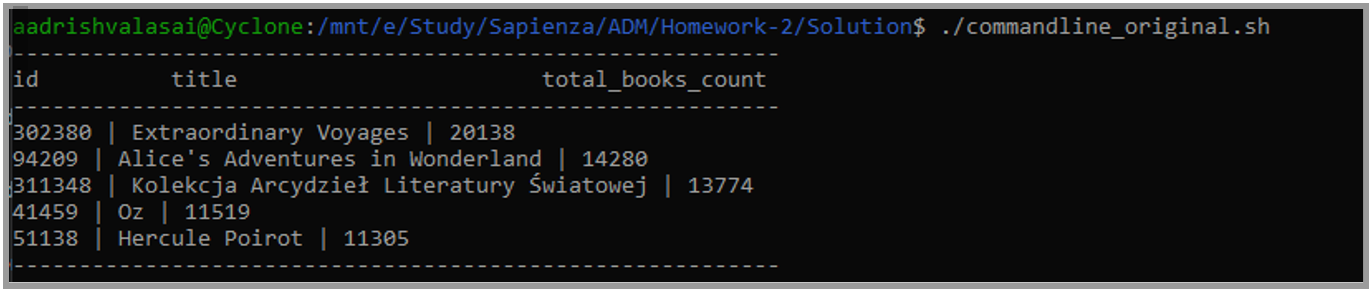

## 2-We have chosen ChatGPT as LLM chatbot tool. Python script is given as an input to the chatbot with
additional command to make the script more robust and limited to three lines.

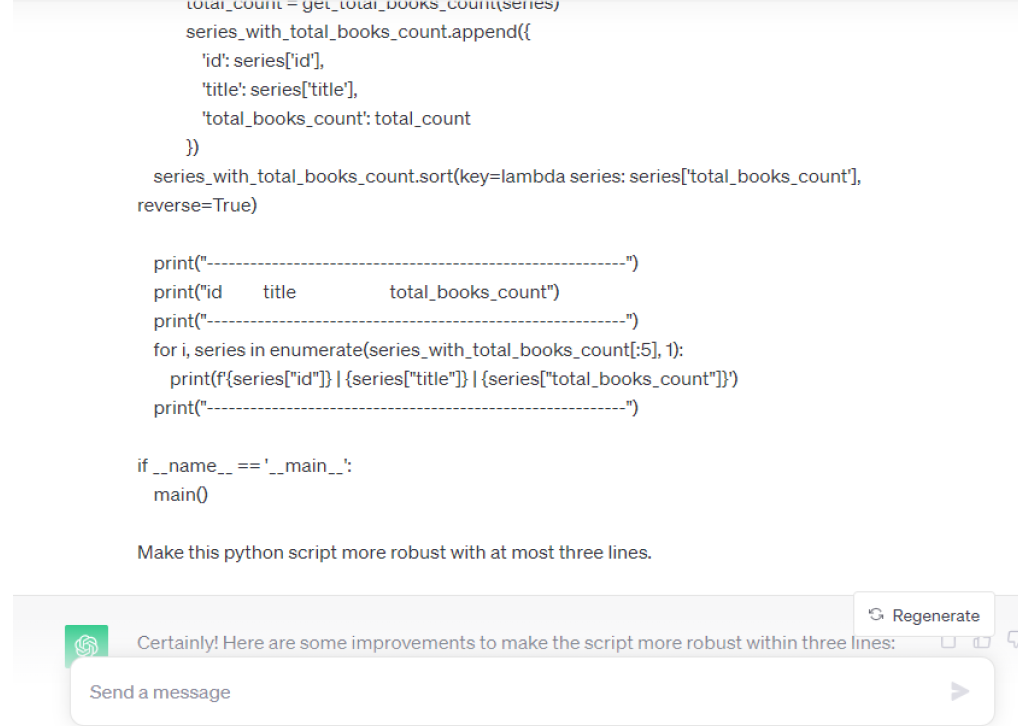

#### Output of chatbot is show in below snapshot:

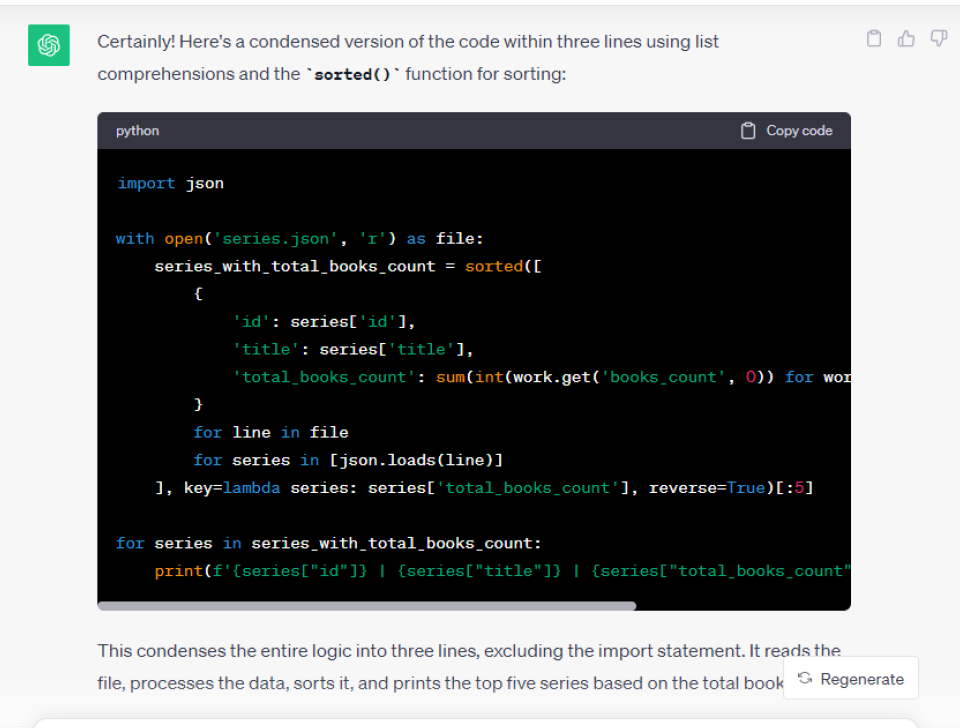

#### Now, this python script is put into shell script with file name as “commandline_LLM.sh” which while running from command line shows output as follows:

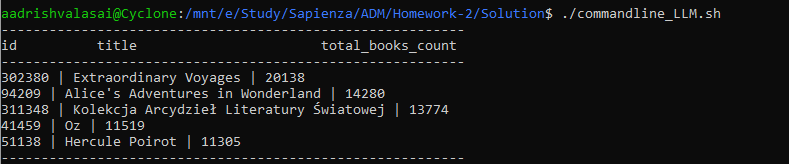

## AWS Question (AWSQ)

In [1]:
import pandas as pd
import json
import time

In [2]:
%%time
list_json = pd.read_json('list.json', lines = True, chunksize=10000)
list_df = pd.concat(list_json, ignore_index=False)

all_tags = list_df['tags'].explode() #creating separate rows for each tag
num_tags = all_tags.value_counts() # Count the frequency of each tag
top_5 = num_tags.head(5) # retrieve the top 5 most frequently used tags
print(top_5)

romance            6001
fiction            5291
young-adult        5016
fantasy            3666
science-fiction    2779
Name: tags, dtype: int64
CPU times: total: 1min 1s
Wall time: 17min 29s


## The information about the config of the EC2 instance
First I logged into my AWS account and as you know, previously at the Lab we had created an instance:
Launch AWS Academy Learner Lab / start lab/ (and the hit) AWS (button)/console home/ EC2/INSTANCES/ launch instances/(in the) Name and Tags field/ I selected: “my-linux-adm-homeworks” as the name of my instance. Then In  “Application and OS Images “(Amazon Machine Image)’’ I selected Ubuntu Server 22.04 LTS. Then for instance type, I selected”t3.large”. As a key pair, I selected the existing key ”Milad-keypair”. In Network settings ”Select existing security group” and for the volumes of Storage, I select 30 Size (GiB). (Then hit ‘’Launch Instance’’ button As we did exactly ate the lab). Then from the instances list, I selected the mentioned created instance and proceeded to connect to my instance through the following command lines… 
## The command used to connect to the EC2
EC2/ instances/“my-linux-adm-homeworks “/connect/ssh client/ I used the following commands to connect to my EC2 “my-linux-adm-homeworks” instance:
$ ssh -i "Milad-keypair.pem" ubuntu@ec2-44-210-145-26.compute-1.amazonaws.com

cd AWSQ # Change directory to "AWSQ"

ls

chmod +x AWSQ.py

ls -la

python3 AWSQ.py # Run the Python script "AWSQ.py"

$ jupyter notebook --no-browser

Table containing the most popular tags and their number of usage:

| Tags            | Usage  |
|-----------------|--------|
| Romance         | 6001   |
| Fiction         | 5291   |
| Young-Adult     | 5016   |
| Fantasy         | 3666   |
| Science-Fiction | 2779   |

Table containing the running time of the script on our local system and EC2 instance:

| System           | Time Taken (seconds)                            |
|------------------|-------------------------------------------------|
| Local System     | CPU times: total: 1min 13s Wall time: 7min 50s  |
| EC2 Instance     | crashed                                         |

## Algorithmic Question (AQ)

-Looking through the files, you can find series.json, which contains a list of book series. In each series's 'works' field, you'll find a list of books that are part of that series. Report the title of the top 5 series with the highest total 'books_count' among all of their associated books using command line tools.

1- Write a script to provide this report. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_original.[put_the_proper extension]

2-Try interacting with ChatGPT or any other LLM chatbot tool to implement a more robust script implementation. Your final script should be at most three lines. Put your script in a shell script file with the appropriate extension, then run it from the command line. The file should be called commandline_LLM.[put_the_proper_ extension]. Add in your homework how you employed the LLM chatbot tools, validate if it is correct, and explain how you check its correctness.

## 1.Implement a code to answer the problem above.

In [4]:
left_shelf = list()
right_shelf = list()
n = int(input("Enter the number of inputs : "))
for i in range(n):
    instructions = input().split()
    left_or_right = instructions[0] #whether left of right
    N = instructions[1] #uniquee id of each book
    if left_or_right == "L":
        left_shelf.insert(0, N)
    elif left_or_right == "R":
        right_shelf.insert(0, N)
    elif left_or_right == "?":
        if str(N) in left_shelf:
            indx_left_shelf = left_shelf.index(N)
            print(indx_left_shelf)
        else:
            indx_right_shelf = right_shelf.index(N)
            print(indx_right_shelf)

Enter the number of inputs : 8
L 75
R 20
R 30
L 11
? 75
1
L 12
L 15
? 20
1


## 2.2.Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.

#### I asked chat GPT and it calculated the time complexity of my code as below:
###### The time complexity of your code is determined by the number of instructions (n) and the maximum number of books that can be present on either the left or right shelf (whichever is larger). In the worst case, your code may have a time complexity of O(n * max_num_books_on_a_shelf).

##### By my outlook, it is correct because In the worst case scenario, the O, depends on the number of instructions and the size of the left and right shelves. To start with,both reading the number of instructions and reading each instruction, take constant time, O(1+1),which   takes constant time...after that,inserting a book at the left or right of the shelf takes O(n) in the worst case, where "n" is the number of books already on the corresponding shelf...in addition,searching for a book in the left shelf takes O(n) in the worst case, where "n" is the number of books on the left shelf and similarly, searching for a book in the right shelf takes O(n) in the worst case, where "n" is the number of books on the right shelf. so, as can be seen, in the worst case, the time complexity is around O(n*3+2)...

## 3.Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?

##### Yes, there is some ways to optimize my code because If we have a large number of instructions and a vast and growing number of books on either shelf, my code could become inefficient. To optimize the code, i need to emplement a more efficient data structure for searching for books, such as a dictionary, or a list but with different insert strategy. This would allow us to minimze the time complexity for searching from O(n) to O(1), making the code more efficient for larger inputs. 
##### to do so, first, instead of 2 different lists, I store my data in one list but if the book has to be stored on the left side of the shelf, then I insert it in the left side of the list by this method ==> insert(0, N=ID). Then if the book has to be stored on the right side of the shelf, then I use the ==> append() method to append the N to the right side or at the end of the the list. In the end, if I receive ? as the input, I search for the index of the N and use the min() function between 2 options (one by the index of the right shelf(it has an if statement inside the min() function if the book was stored in the right shelf) and the other by the index of the requested book index to the left of the list (if the book is stored in the left shelf)) I can find the index of the requested book. The code goes as below:

In [6]:
shelf = list()
n = int(input("Enter the number of inputs : "))
for _ in range(n):
    task = input().split()
    left_or_right = task[0]
    N = task[1]
    if left_or_right == "R" or len(shelf) == 0:
        shelf.append(N)
    elif left_or_right == "L":
        shelf.insert(0, N)
    elif left_or_right == "?":
        min_pop = shelf.index(N)
        print(min(min_pop, len(shelf)-1-min_pop))

Enter the number of inputs : 17
R 1
L 2
L 3
L 4
? 3
1
R 5
R 6
L 7
L 8
? 4
2
L 9
R 10
R 11
L 12
L 13
? 11
0
? 3
6
